<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 3/ML/tugas/tugas06/data/data.csv', sep=',')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(df["diagnosis"].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [7]:
df_clean = df.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
df_clean['diagnosis'] = df_clean['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [9]:
y = df_clean['diagnosis']
X = df_clean.drop('diagnosis', axis=1)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:
print(X_scaled.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [13]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
model_rbf = SVC(kernel='rbf', random_state=42)

In [16]:
model_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [17]:
y_pred_rbf = model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Akurasi Model (RBF): {accuracy_rbf * 100:.2f}%")

Akurasi Model (RBF): 97.37%


In [18]:
cm = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix (RBF):\n", cm)

Confusion Matrix (RBF):
 [[70  1]
 [ 2 41]]


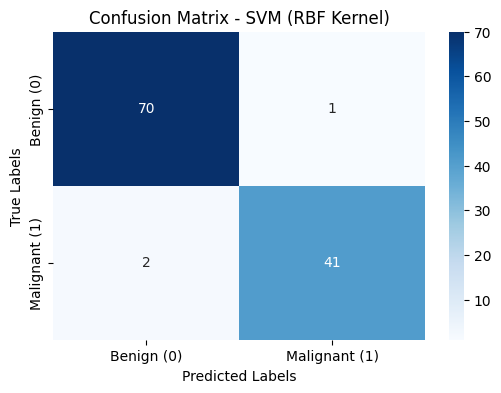

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('breastcancer_confusion_matrix.png')

In [20]:
print("\nLaporan Klasifikasi (RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=['Benign (0)', 'Malignant (1)']))


Laporan Klasifikasi (RBF):
               precision    recall  f1-score   support

   Benign (0)       0.97      0.99      0.98        71
Malignant (1)       0.98      0.95      0.96        43

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



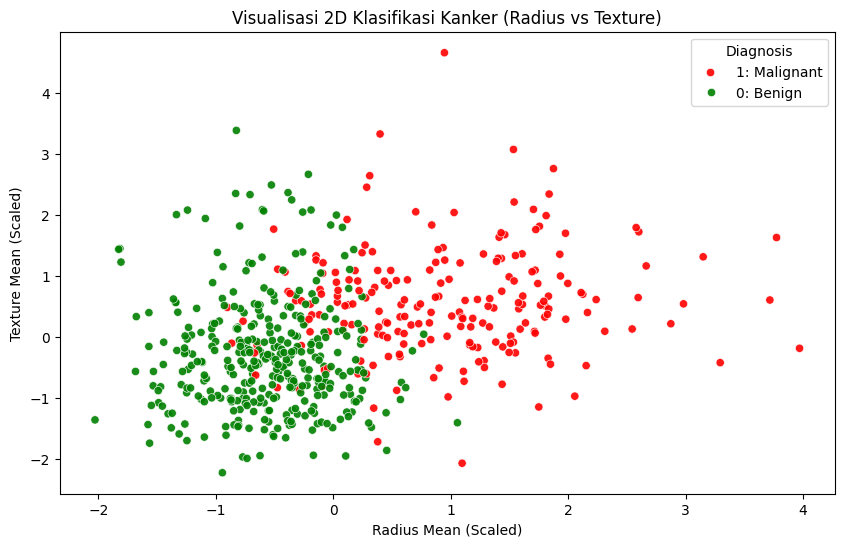

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled['radius_mean'], y=X_scaled['texture_mean'], hue=y,
                palette={0: 'g', 1: 'r'}, alpha=0.9)
plt.xlabel('Radius Mean (Scaled)')
plt.ylabel('Texture Mean (Scaled)')
plt.title('Visualisasi 2D Klasifikasi Kanker (Radius vs Texture)')
plt.legend(title='Diagnosis', loc='best', labels=['1: Malignant', '0: Benign'])
plt.savefig('breastcancer_svm_2d_plot.png')

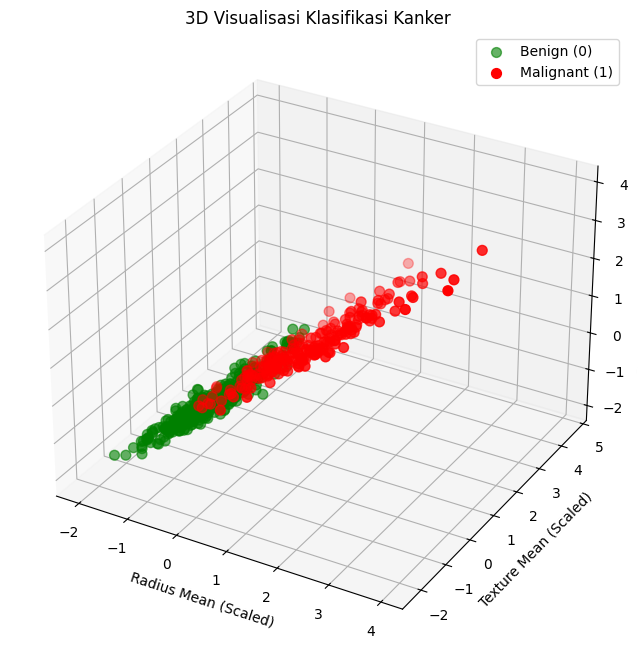

In [23]:
X_plot_3d = X_scaled.copy()
X_plot_3d['diagnosis'] = y
class_0 = X_plot_3d[X_plot_3d['diagnosis'] == 0]
class_1 = X_plot_3d[X_plot_3d['diagnosis'] == 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class_0['radius_mean'], class_0['texture_mean'], class_0['perimeter_mean'],
           color='g', label='Benign (0)', s=50, alpha=0.6)

ax.scatter(class_1['radius_mean'], class_1['texture_mean'], class_1['perimeter_mean'],
           color='r', label='Malignant (1)', s=50)

ax.set_xlabel('Radius Mean (Scaled)')
ax.set_ylabel('Texture Mean (Scaled)')
ax.set_zlabel('Perimeter Mean (Scaled)')
ax.set_title('3D Visualisasi Klasifikasi Kanker')
ax.legend()
plt.savefig('breastcancer_svm_3d_plot.png')